In [1]:
import random
import os
import glob
import math
os.chdir('Prim')

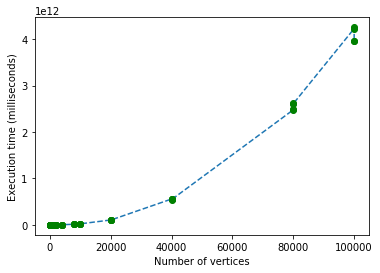

In [47]:
# Naive_Kruskal's algorithm

list_mst_kn = [(10, 24000), (10, 33500), (10, 29400), (10, 27900), (20, 91200), (20, 5147100), (20, 152800), (20, 92200), (40, 571900), (40, 346500), (40, 346400), (40, 550600), (80, 1239300), (80, 1487600), (80, 1385500), (80, 1315100), (100, 2483500), (100, 1952000), (100, 1990500), (100, 1939200), (200, 8082000), (200, 7891200), (200, 7603400), (200, 7953400), (400, 34503800), (400, 33490400), (400, 32684800), (400, 34072400), (800, 136868000), (800, 135395600), (800, 130161100), (800, 133434400), (1000, 209607900), (1000, 213754400), (1000, 204260800), (1000, 218018100), (2000, 891738600), (2000, 898465300), (2000, 889159400), (2000, 910125800), (4000, 3527424100), (4000, 3595979500), (4000, 3625231700), (4000, 3661937500), (8000, 14946859200), (8000, 14723164800), (8000, 14599143700), (8000, 15127928900), (10000, 23383172800), (10000, 22737335600), (10000, 22808731300), (10000, 23072231600), (20000, 106005614600), (20000, 105631635500), (20000, 101904117700), (20000, 103504139900), (40000, 557280065300), (40000, 551891321500), (40000, 551483565100), (40000, 544082208200), (80000, 2478429175000), (80000, 2492984700900), (80000, 2620204579200), (80000, 2610450370400), (100000, 4227941673900), (100000, 4257019386700), (100000, 3967225259000), (100000, 3960368585300)]

x_val = []
y_val = []

for (x,y) in list_mst_kn:
    x_val.append(x)
    y_val.append(y)


import matplotlib.pyplot as plt
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [48]:
def initialize(fileaddress):
    vertices = set()
    edges = [] 
    with open(glob.glob(fileaddress)[0]) as f:
        lines = f.readlines()
    Number_Of_V_E = lines[0].split()
    return Number_Of_V_E

V_E_C = []
for i in os.listdir():
    Number_Of_V_E = initialize(i)
    V_E_C.append((int(Number_Of_V_E[0]),int(Number_Of_V_E[1])))
list_sizes = [item[0] for item in list_mst_kn]
run_times = [item[1] for item in list_mst_kn]

ratios = [None]
for i in range(len(run_times)-1):
    ratios.append(run_times[i+1]/run_times[i])

c_estimates = []
for i in range(len(run_times)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    c_estimates.append(run_times[i]/(E * V))

print("Size\t\tTime(ns)\t\t\tCostant\t\t\t\tRatio")
print(100*"-")
for i in range(len(list_sizes)):
    print(list_sizes[i], run_times[i], '', c_estimates[i], '', ratios[i], sep="\t\t")
print(100*"-")

c = sum(c_estimates)/(len(c_estimates)-50)
print("Our average C is: ", c)

Size		Time(ns)			Costant				Ratio
----------------------------------------------------------------------------------------------------
10		24000				266.6666666666667				None
10		33500				304.54545454545456				1.3958333333333333
10		29400				226.15384615384616				0.8776119402985074
10		27900				279.0				0.9489795918367347
20		91200				190.0				3.2688172043010755
20		5147100				10723.125				56.4375
20		152800				272.85714285714283				0.029686619649899944
20		92200				177.30769230769232				0.6034031413612565
40		571900				255.3125				6.202819956616052
40		346500				173.25				0.605875152998776
40		346400				173.2				0.9997113997113997
40		550600				264.71153846153845				1.5894919168591224
80		1239300				143.4375				2.2508172902288415
80		1487600				187.82828282828282				1.2003550391349955
80		1385500				166.52644230769232				0.9313659585910191
80		1315100				144.19956140350877				0.9491880187657885
100		2483500				182.61029411764707				1.888449547562923
100		1952000				151.31782945736435		

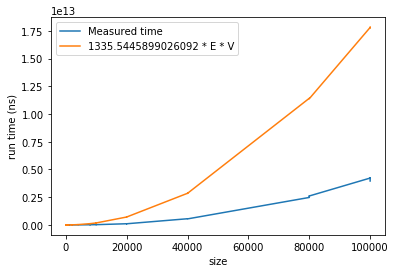

In [49]:
import matplotlib.pyplot as plt

x = []
for i in range(len(V_E_C)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    x.append((V,c * E * V))

import matplotlib.pyplot as plt
results = sorted(x,key=lambda x: x[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]
plt.plot(list_sizes, run_times)
plt.plot(x_val, y_val)
plt.legend(["Measured time", f"{c} * E * V"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()

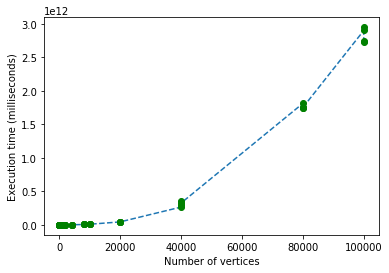

In [50]:
# Efficient_Kruskal's algorithm

list_mst_ke = [(10, 30100), (10, 37800), (10, 38200), (10, 77200), (20, 86600), (20, 115900), (20, 92600), (20, 94000), (40, 314300), (40, 307300), (40, 242900), (40, 352300), (80, 795000), (80, 828000), (80, 1121600), (80, 783600), (100, 1367100), (100, 1389600), (100, 1160900), (100, 1073700), (200, 4117500), (200, 4033000), (200, 4155600), (200, 4197900), (400, 16837600), (400, 16215100), (400, 15222400), (400, 15251300), (800, 62482600), (800, 64100100), (800, 61568300), (800, 63601000), (1000, 95166600), (1000, 97393600), (1000, 98970100), (1000, 96134100), (2000, 405935200), (2000, 406663000), (2000, 406176000), (2000, 418425400), (4000, 1644818700), (4000, 1645803200), (4000, 1651764700), (4000, 1663303200), (8000, 6653808500), (8000, 6638481500), (8000, 6804117300), (8000, 6644977200), (10000, 10374184800), (10000, 10260758700), (10000, 10362527700), (10000, 10361383400), (20000, 44795341600), (20000, 45190369400), (20000, 45116802000), (20000, 45606853700), (40000, 266453271100), (40000, 292673057200), (40000, 357639664900), (40000, 326709056300), (80000, 1811962037900), (80000, 1745814066400), (80000, 1745204057500), (80000, 1751260676000), (100000, 2898594067500), (100000, 2946948211400), (100000, 2732021579800), (100000, 2738280031800)]

x_val = []
y_val = []

for (x,y) in list_mst_ke:
    x_val.append(x)
    y_val.append(y)


import matplotlib.pyplot as plt
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [51]:
def initialize(fileaddress):
    vertices = set()
    edges = [] 
    with open(glob.glob(fileaddress)[0]) as f:
        lines = f.readlines()
    Number_Of_V_E = lines[0].split()
    return Number_Of_V_E

V_E_C = []
for i in os.listdir():
    Number_Of_V_E = initialize(i)
    V_E_C.append((int(Number_Of_V_E[0]),int(Number_Of_V_E[1])))
list_sizes = [item[0] for item in list_mst_ke]
run_times = [item[1] for item in list_mst_ke]

ratios = [None]
for i in range(len(run_times)-1):
    ratios.append(run_times[i+1]/run_times[i])

c_estimates = []
for i in range(len(run_times)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    c_estimates.append(run_times[i]/( E * math.log(V)))

print("Size\t\tTime(ns)\t\t\tCostant\t\t\t\tRatio")
print(100*"-")
for i in range(len(list_sizes)):
    print(list_sizes[i], run_times[i], '', c_estimates[i], '', ratios[i], sep="\t\t")
print(100*"-")

c = sum(c_estimates)/(len(c_estimates)-50)
print("Our average C is: ", c)

Size		Time(ns)			Costant				Ratio
----------------------------------------------------------------------------------------------------
10		30100				1452.4737672542087				None
10		37800				1492.39376508572				1.255813953488372
10		38200				1276.157631438786				1.0105820105820107
10		77200				3352.7534002931034				2.020942408376963
20		86600				1204.491257508997				1.121761658031088
20		115900				1612.015435857884				1.338337182448037
20		92600				1103.9514065852834				0.7989646246764452
20		94000				1206.8450332831308				1.0151187904967602
40		314300				1521.464734701697				3.3436170212765957
40		307300				1666.088598570446				0.977728285077951
40		242900				1316.931079052266				0.7904328018223234
40		352300				1836.6010828693086				1.4503911074516262
80		795000				1679.841709054089				2.2565994890718137
80		828000				1908.622895501593				1.0415094339622641
80		1121600				2461.1021985305656				1.3545893719806763
80		783600				1568.6084963830597				0.698644793152639
100		1367100				2182.

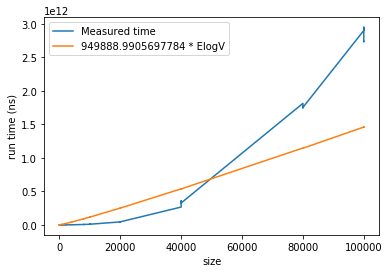

In [52]:
import matplotlib.pyplot as plt

x = []
for i in range(len(V_E_C)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    x.append((V,c * E * math.log(V)))

import matplotlib.pyplot as plt
results = sorted(x,key=lambda x: x[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]
plt.plot(list_sizes, run_times)
plt.plot(x_val, y_val)
plt.legend(["Measured time", f"{c} * ElogV"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()

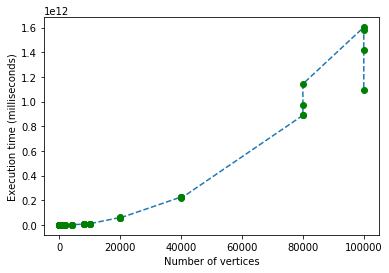

In [53]:
# Prim's algorithm

list_mst_prim = [(10, 4355300), (10, 128100), (10, 107400), (10, 99400), (20, 3421300), (20, 238200), (20, 282500), (20, 287100), (40, 7247600), (40, 654500), (40, 325800), (40, 494100), (80, 9702400), (80, 1700400), (80, 1733100), (80, 1696300), (100, 5735700), (100, 2028500), (100, 2030500), (100, 1152300), (200, 13903200), (200, 5166600), (200, 4637500), (200, 3602800), (400, 31708700), (400, 15091700), (400, 17149700), (400, 15300800), (800, 56447400), (800, 46558800), (800, 35771100), (800, 35466200), (1000, 66592100), (1000, 53684800), (1000, 53848500), (1000, 62211300), (2000, 326068800), (2000, 406340500), (2000, 364582400), (2000, 319829000), (4000, 1202567900), (4000, 1305049400), (4000, 1190213300), (4000, 1407215900), (8000, 6204968500), (8000, 5794934800), (8000, 5814232600), (8000, 6311198700), (10000, 11173796700), (10000, 9897901000), (10000, 10710801000), (10000, 9994435300), (20000, 60371450600), (20000, 55051547700), (20000, 54955554100), (20000, 57129661100), (40000, 226272122200), (40000, 226766523100), (40000, 225438016300), (40000, 216775374500), (80000, 888661425100), (80000, 891350400300), (80000, 974431796400), (80000, 1143032363900), (100000, 1602818212400), (100000, 1579950916500), (100000, 1420967900800), (100000, 1091998307900)]

x_val = []
y_val = []

for (x,y) in list_mst_prim:
    x_val.append(x)
    y_val.append(y)


import matplotlib.pyplot as plt
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [54]:
def initialize(fileaddress):
    vertices = set()
    edges = [] 
    with open(glob.glob(fileaddress)[0]) as f:
        lines = f.readlines()
    Number_Of_V_E = lines[0].split()
    return Number_Of_V_E

V_E_C = []
for i in os.listdir():
    Number_Of_V_E = initialize(i)
    V_E_C.append((int(Number_Of_V_E[0]),int(Number_Of_V_E[1])))
list_sizes = [item[0] for item in list_mst_prim]
run_times = [item[1] for item in list_mst_prim]

ratios = [None]
for i in range(len(run_times)-1):
    ratios.append(run_times[i+1]/run_times[i])

c_estimates = []
for i in range(len(run_times)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    c_estimates.append(run_times[i]/( E * math.log(V)))

print("Size\t\tTime(ns)\t\t\tCostant\t\t\t\tRatio")
print(100*"-")
for i in range(len(list_sizes)):
    print(list_sizes[i], run_times[i], '', c_estimates[i], '', ratios[i], sep="\t\t")
print(100*"-")

c = sum(c_estimates)/(len(c_estimates)-50) #to try and get the upper side of the constant, computing the average is not good enough
print("Our average C is: ", c)

Size		Time(ns)			Costant				Ratio
----------------------------------------------------------------------------------------------------
10		4355300				210164.75078147027				None
10		128100				5057.556648346051				0.02941244001561316
10		107400				3587.940565877634				0.8384074941451991
10		99400				4316.887150118322				0.925512104283054
20		3421300				47585.749876622765				34.41951710261569
20		238200				3313.0463919011904				0.0696226580539561
20		282500				3367.8863105868527				1.1859781696053737
20		287100				3686.012862293477				1.016283185840708
40		7247600				35084.21193517028				25.244165795889934
40		654500				3548.503051624982				0.09030575638832165
40		325800				1766.3900599227184				0.49778456837280366
40		494100				2575.829108843955				1.5165745856353592
80		9702400				20501.253079152695				19.63651082776766
80		1700400				3919.5922361242856				0.17525560686015831
80		1733100				3802.9031921124497				1.0192307692307692
80		1696300				3395.649045960419				0.9787663723962842
1

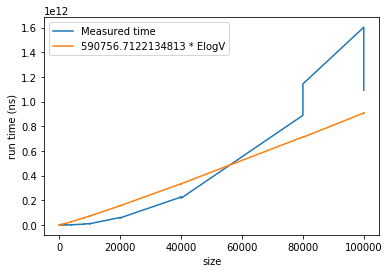

In [55]:
import matplotlib.pyplot as plt

x = []
for i in range(len(V_E_C)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    x.append((V,c * E * math.log(V)))

import matplotlib.pyplot as plt
results = sorted(x,key=lambda x: x[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]
plt.plot(list_sizes, run_times)
plt.plot(x_val, y_val)
plt.legend(["Measured time", f"{c} * ElogV"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()